# ЛР №1 - Задача предсказания оттока клиентов банка
# Выполнил Угарин Никита Александрович

### 1. Импорт библиотек


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler

%matplotlib inline

### 2. Загрузка данных

In [3]:
data = pd.read_csv('churn.csv')
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Проверка пропусков

In [4]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Описательная статистика

In [5]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


### 3. Визуализация

Распределение целевого признака


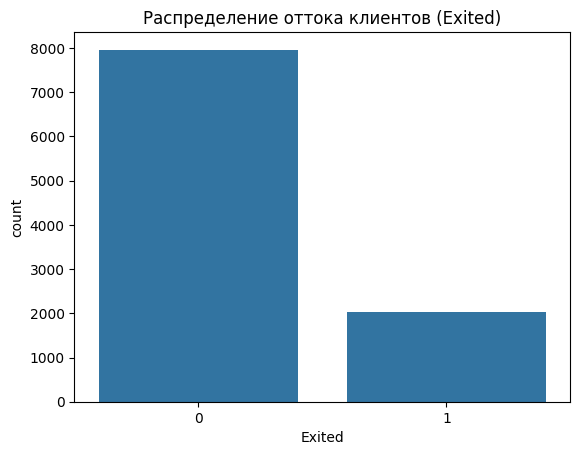

In [7]:
sns.countplot(x='Exited', data=data)
plt.title('Распределение оттока клиентов (Exited)')
plt.show()

Визуализация категориальных признаков

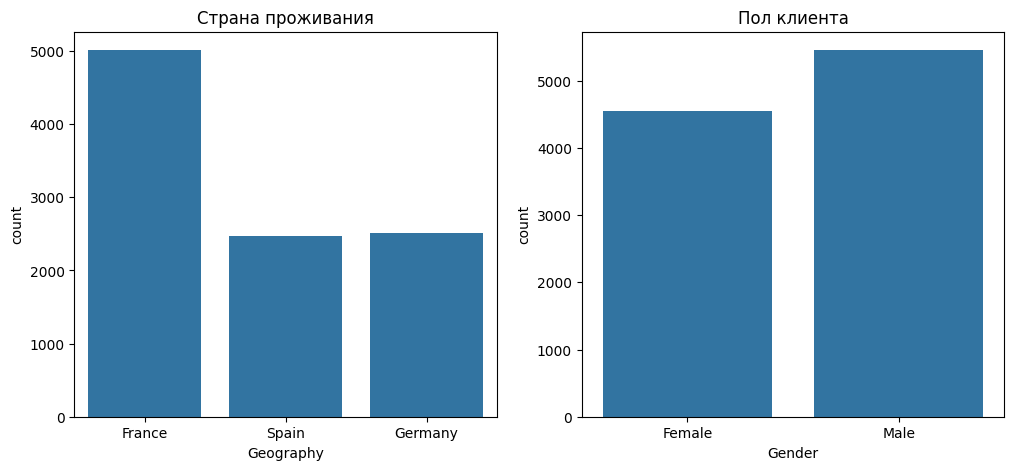

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='Geography', data=data, ax=axes[0])
sns.countplot(x='Gender', data=data, ax=axes[1])
axes[0].set_title('Страна проживания')
axes[1].set_title('Пол клиента')
plt.show()

### 4. Предобработка данных

Удаляем неинформативные столбцы


In [9]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Затем

In [10]:
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])
data = pd.get_dummies(data, columns=['Geography'], drop_first=True)

data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


### 5. Разделение на обучающую и тестовую выборки

In [11]:
X = data.drop('Exited', axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Масштабирование признаков


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 6. Обучение модели логистической регрессии


In [13]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

### 7. Оценка качества модели

In [14]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('ROC-AUC:', roc_auc_score(y_test, y_proba))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.808
ROC-AUC: 0.7747778595236223
Confusion matrix:
 [[1540   53]
 [ 331   76]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



ROC-кривая


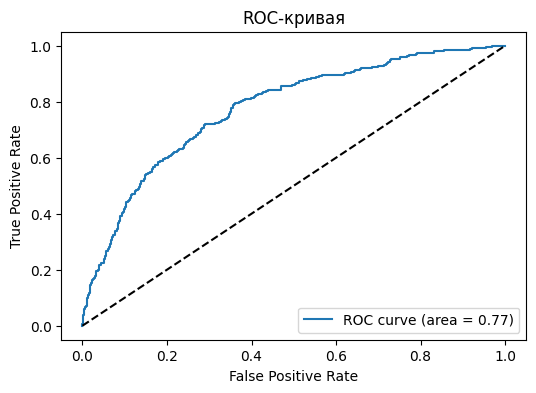

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc='lower right')
plt.show()

### 8. Коэффициенты

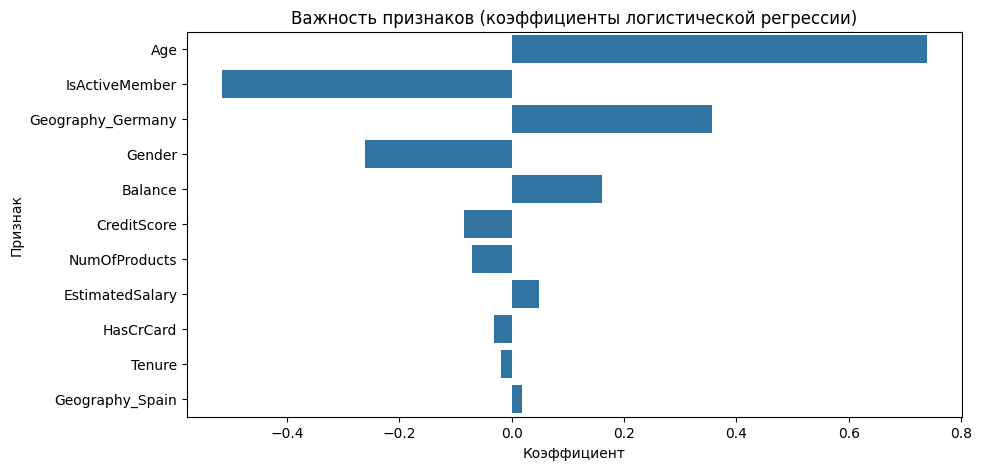

In [19]:
# Получаем имена признаков (если использовали pd.get_dummies, X.columns сохранит их)
feature_names = X.columns

# Получаем коэффициенты
coefficients = model.coef_[0]

# Создаём DataFrame для наглядности
coef_df = pd.DataFrame({'Признак': feature_names, 'Коэффициент': coefficients})

# Сортируем по абсолютному значению коэффициента
coef_df = coef_df.reindex(coef_df.Коэффициент.abs().sort_values(ascending=False).index)

# Визуализация
plt.figure(figsize=(10, 5))
sns.barplot(x='Коэффициент', y='Признак', data=coef_df)
plt.title('Важность признаков (коэффициенты логистической регрессии)')
plt.show()

In [20]:
coef_df['Odds_ratio'] = np.exp(coef_df['Коэффициент'])
display(coef_df)

,Признак,Коэффициент,Odds_ratio
2,Age,0.738847,2.093520
7,IsActiveMember,-0.515485,0.597211
9,Geography_Germany,0.356679,1.428578
1,Gender,-0.260851,0.770396
4,Balance,0.160622,1.174241
0,CreditScore,-0.085986,0.917607
5,NumOfProducts,-0.070292,0.932122
8,EstimatedSalary,0.047725,1.048882
6,HasCrCard,-0.032208,0.968306
3,Tenure,-0.020071,0.980129
